In [1]:
import pandas as pd
import numpy as np
import os as path
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#### Defining/Importing data source:

In [2]:
#path.chdir("D:\My Docs\Studies\Singapore Uni of Social Science (SUSS)\Jul'22 registration\Study Materials\ANL252\ECA\Original")
#path.getcwd()
df_profile = pd.read_csv("ECA_data.csv")
pd.set_option("display.max_rows",300)

In [3]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18769 non-null  int64  
 1   LIMIT      18769 non-null  int64  
 2   BALANCE    18769 non-null  float64
 3   INCOME     18769 non-null  int64  
 4   RATING     18769 non-null  int64  
 5   GENDER     18769 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18731 non-null  float64
 8   AGE        18769 non-null  int64  
 9   S1         18769 non-null  int64  
 10  S2         18769 non-null  int64  
 11  S3         18769 non-null  int64  
 12  S4         18769 non-null  int64  
 13  S5         18769 non-null  int64  
 14  B1         18769 non-null  int64  
 15  B2         18769 non-null  int64  
 16  B3         18769 non-null  int64  
 17  B4         18769 non-null  int64  
 18  B5         18769 non-null  int64  
 19  R1         18769 non-null  int64  
 20  R2    

Based on the result,

numeric variables are ID, Limit, Balance, Income, Age, B(n) and R(n)

categorical variables are Gender, Education, Marital, S(n) and RATING

In [4]:
df_profile.nunique()

ID           18766
LIMIT           80
BALANCE      14860
INCOME       17701
RATING           2
GENDER           2
EDUCATION        4
MARITAL          3
AGE             59
S1               9
S2              10
S3               9
S4               8
S5               8
B1           14839
B2           14636
B3           14359
B4           14021
B5           13807
R1            5987
R2            5770
R3            5218
R4            5143
R5            5201
dtype: int64

## Data Pre-processing stage

There are 13 null values under EDUCATION column and 38 nulls values under MARITAL columns

In [5]:
df_profile.isnull().sum()

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

In [6]:
missing_pct = df_profile.isnull().sum()/len(df_profile)
df_missing = pd.DataFrame({"% missing":missing_pct})
df_missing

,% missing
ID,0.000000
LIMIT,0.000000
BALANCE,0.000000
INCOME,0.000000
RATING,0.000000
GENDER,0.000000
EDUCATION,0.000693
MARITAL,0.002025
AGE,0.000000
S1,0.000000


Heatmap shows the correlation of missingness between every 2 columns
A value near 0 means there is no dependence between the occurrence of missing values of two variables.
Therefore, there're no correlations.

<AxesSubplot:>

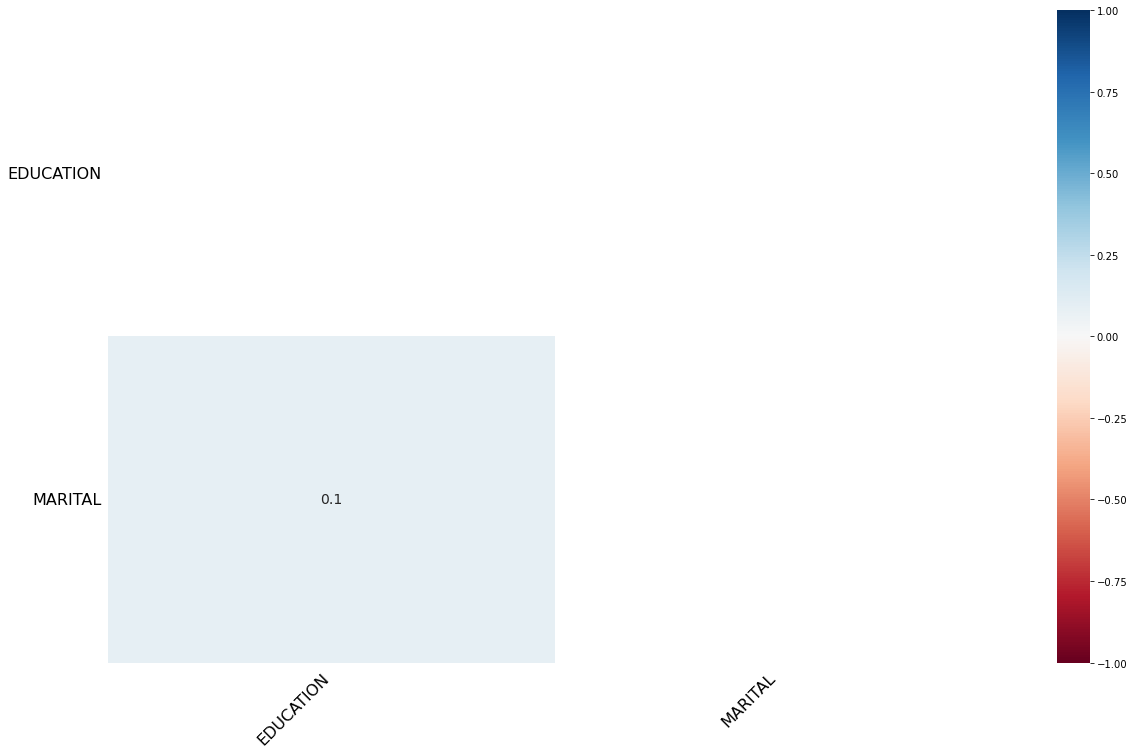

In [7]:
msno.heatmap(df_profile)

In [8]:
df_profile.skew()

C:\Users\mkumar\AppData\Local\Temp\ipykernel_24004\1392701635.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_profile.skew()


ID            0.000052
LIMIT         0.973806
BALANCE       2.595098
INCOME        1.003418
RATING        1.357285
GENDER       -0.487097
EDUCATION     0.077203
MARITAL      -0.275421
AGE           1.942488
S1            1.542494
S2            1.654990
S3            2.136326
S4            2.506122
S5            2.458763
B1            2.606001
B2            2.715728
B3            2.721220
B4            2.826055
B5            2.688293
R1           26.076208
R2           14.967590
R4           11.386342
R5           10.882639
dtype: float64

#### Data Pre-processing stage - Task 1:

Since proportion of missing values for education is miniscule and the distribution is highly symmetrical, as evident from the skewness value very close to 0, the missing education values will be replaced with the most commonly occuring education level.

In [9]:
df_profile["EDUCATION"].fillna(df_profile["EDUCATION"].mode()[0], inplace=True)

In [10]:
df_profile.isnull().sum()

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION     0
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

#### Data Pre-processing stage - Task 2:

Removing THREE duplicate IDs, namely, 132, 378 and 420

In [11]:
df_profile[df_profile.duplicated(subset="ID", keep=False)==True]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
131,132,200000,1270.675,188181,0,1,2.0,1.0,40,-1,...,32333,12610,7850,977,9205,13587,7850,0,9205,0
132,132,200000,1270.675,188181,0,1,2.0,1.0,40,-1,...,32333,12610,7850,977,9205,13587,7850,0,9205,0
378,378,240000,39804.975,256476,0,1,2.0,2.0,35,0,...,232729,223431,226361,223508,238587,10000,8000,9000,19000,9000
379,378,240000,39804.975,256476,0,1,2.0,2.0,35,0,...,232729,223431,226361,223508,238587,10000,8000,9000,19000,9000
421,420,30000,1883.700,32877,1,1,1.0,2.0,23,2,...,10454,11862,12104,12351,8000,2000,242,247,2000,0
422,420,30000,1883.700,32877,1,1,1.0,2.0,23,2,...,10454,11862,12104,12351,8000,2000,242,247,2000,0


In [12]:
df_profile.drop_duplicates(subset="ID", inplace=True)
df_profile.reset_index(inplace=True)
df_profile[df_profile.duplicated(subset="ID", keep=False)==True]

,index,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5


#### Interim Transformation task:
This is to ascertain the spread and range of INCOME values.

In [13]:
pd.unique(df_profile["INCOME"].sort_values())
print(pd.unique(df_profile["INCOME"].sort_values()))

[ 10000  10032  10034 ... 868807 873991 908846]


Discretise the INCOME values into different income range to facilitate data-preoprocessing and subsequent analysis. Since the minimum value is 10,000 and maximum value is 908,846, the most appropriate bin size is 200,000, resulting in 5 income-range categories.

In [14]:
bin_range = [1, 200000, 400000, 600000, 800000, 1000000]
bin_label = ["200K", "400K", "600K", "800K", "1000K"]
df_profile["INCOME_bins"] = pd.cut(x=df_profile["INCOME"], bins=bin_range, labels=bin_label, right=False)
df_profile["INCOME_bins"]

0        400K
1        400K
2        600K
3        200K
4        200K
         ... 
18761    400K
18762    200K
18763    200K
18764    200K
18765    200K
Name: INCOME_bins, Length: 18766, dtype: category
Categories (5, object): ['200K' < '400K' < '600K' < '800K' < '1000K']

#### Data Pre-processing stage - Task 3:
Records with missing marital status largely fall under Income group of 200K and 400K.

In [15]:
df_profile[df_profile["MARITAL"].isnull()]

,index,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,...,B2,B3,B4,B5,R1,R2,R3,R4,R5,INCOME_bins
518,521,519,290000,9195.725,294806,0,1,2.0,NaN,49,...,53841,54486,55198,55878,1926,1931,1989,2002,2028,400K
691,694,692,140000,13279.525,151880,0,0,3.0,NaN,47,...,57233,52295,49047,38796,5017,10012,10013,3010,6015,200K
816,819,817,80000,1237.250,74355,0,1,3.0,NaN,37,...,5210,3882,4785,1000,5215,3882,4785,1968,0,200K
844,847,845,30000,3525.025,20346,0,1,3.0,NaN,46,...,22194,21542,24022,25473,3000,0,3000,2000,0,200K
1498,1501,1499,70000,2861.950,56633,0,1,3.0,NaN,34,...,16720,18438,18004,19546,0,2000,0,2000,0,200K
2591,2594,2592,120000,578.725,143627,0,1,3.0,NaN,41,...,0,0,1344,881,0,0,1344,929,599,200K
5347,5350,5348,20000,315.000,23066,0,0,3.0,NaN,29,...,1800,1800,1800,1800,0,0,0,0,0,200K
6051,6054,6052,120000,275.800,121925,0,1,3.0,NaN,47,...,0,0,430,1520,0,0,430,1520,730,200K
6295,6298,6296,80000,12243.700,80169,0,1,3.0,NaN,41,...,39864,38934,38816,38850,2500,2200,2000,2000,2000,200K
6342,6345,6343,110000,15742.125,103703,0,1,3.0,NaN,31,...,84229,79288,73315,63818,4000,5000,3000,3000,3000,200K


Common profile of customer according to Income range and Education level. Both Male and Female are just as likely to get married or stay single. As MARITAL values are fairly symmetrically distributed, use of mode is reasonable.

In [16]:
df_profile.groupby(by=["INCOME_bins","EDUCATION"]).agg({"MARITAL":pd.Series.mode})

MARITAL
INCOME_bins EDUCATION         
200K        0.0            2.0
            1.0            2.0
            2.0            2.0
            3.0            1.0
400K        0.0            1.0
            1.0            2.0
            2.0            1.0
            3.0            1.0
600K        0.0            1.0
            1.0            2.0
            2.0            1.0
            3.0            1.0
800K        0.0            NaN
            1.0            2.0
            2.0            1.0
            3.0            1.0
1000K       0.0            2.0
            1.0            1.0
            2.0            1.0
            3.0            2.0

In [17]:
df_profile["MARITAL"] = np.where((df_profile["MARITAL"].isnull()) & (df_profile["INCOME_bins"]=="400K") & (df_profile.EDUCATION==1), 2, df_profile["MARITAL"])
df_profile["MARITAL"] = np.where((df_profile["MARITAL"].isnull()) & (df_profile["INCOME_bins"]=="400K") & (df_profile.EDUCATION==2), 1, df_profile["MARITAL"])
df_profile["MARITAL"] = np.where((df_profile["MARITAL"].isnull()) & (df_profile["INCOME_bins"]=="400K") & (df_profile.EDUCATION==3), 1, df_profile["MARITAL"])
df_profile["MARITAL"] = np.where((df_profile["MARITAL"].isnull()) & (df_profile["INCOME_bins"]=="200K") & (df_profile.EDUCATION==1), 2, df_profile["MARITAL"])
df_profile["MARITAL"] = np.where((df_profile["MARITAL"].isnull()) & (df_profile["INCOME_bins"]=="200K") & (df_profile.EDUCATION==2), 2, df_profile["MARITAL"])
df_profile["MARITAL"] = np.where((df_profile["MARITAL"].isnull()) & (df_profile["INCOME_bins"]=="200K") & (df_profile.EDUCATION==3), 1, df_profile["MARITAL"])
df_profile[df_profile["MARITAL"].isnull()]

,index,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,...,B2,B3,B4,B5,R1,R2,R3,R4,R5,INCOME_bins


#### Data Pre-processing stage - Task 4:
AGE values cannot be -1 and 199. As AGE values are positively skewed and there are only FIVE error values, median values will be used.

In [18]:
df_profile["AGE"].describe()

count    18766.000000
mean        35.579079
std          9.556664
min         -1.000000
25%         28.000000
50%         34.000000
75%         41.000000
max        199.000000
Name: AGE, dtype: float64

In [19]:
df_profile[(df_profile["AGE"] == -1) | (df_profile["AGE"] == 199)]

,index,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,...,B2,B3,B4,B5,R1,R2,R3,R4,R5,INCOME_bins
532,535,533,160000,87.150,178881,0,1,1.0,1.0,199,...,0,0,0,508,0,0,0,508,1287,200K
661,664,662,20000,1238.125,10000,0,0,1.0,2.0,-1,...,0,0,0,0,0,0,0,0,0,200K
1614,1617,1615,30000,3054.450,18447,0,1,3.0,1.0,199,...,20442,21592,23079,24529,1800,1801,2001,2000,2001,200K
4239,4242,4240,360000,2234.400,415985,0,0,1.0,1.0,-1,...,0,0,0,0,0,0,0,0,0,600K
7830,7833,7831,30000,5063.275,25640,0,1,2.0,1.0,199,...,29349,29400,30000,0,0,1000,600,0,0,200K
15355,15358,15356,250000,105.525,255854,0,1,2.0,2.0,-1,...,2470,3887,4731,8710,2661,3887,1000,4000,1000,400K
18079,18082,18080,20000,2550.800,17393,0,0,3.0,1.0,199,...,17388,17850,17737,27240,1354,2113,1000,1000,1000,200K
18162,18165,18163,240000,39785.550,230383,0,0,1.0,2.0,-1,...,240146,245552,91382,93177,12000,10373,3403,4000,4000,400K
18163,18166,18164,70000,811.650,68051,0,0,1.0,2.0,-1,...,0,0,0,0,0,0,0,0,0,200K
18279,18282,18280,30000,4679.850,16676,0,0,2.0,2.0,199,...,30819,29214,29478,23384,2500,0,910,1000,1000,200K


In [20]:
df_profile["AGE"].replace(to_replace={-1: df_profile["AGE"].median(), 199: df_profile["AGE"].median()}, value=None, inplace=True)
df_profile[(df_profile["AGE"] == -1) | (df_profile["AGE"] == 199)]

ValueError: Series.replace cannot use dict-like to_replace and non-None value

#### Find values under column R3 with "$" string value:

In [ ]:
df_profile[df_profile["R3"].str.find("$")!=-1]

In [ ]:
error_dict = {"$0": 0, "$2,620": 2620, "$6,000": 6000, "$2,200": 2200, "$390": 390, "$2,688": 2688, "$13,069": 13069, "$7,000": 7000, "$5,000": 5000, "$2,089": 2089}
df_profile["R3"].replace(to_replace=error_dict, value=None, inplace=True)
df_profile.astype(dtype={"R3": "int"}, copy=False)

## Generate Insights

#### Insight 1:

Generally, people do not stretch their credit limit too far. Majority of the customers use only 25% of their credit limit, with only a minority spending 50% or more.
In addition, there are more female credit card users than males.

In [ ]:
df_profile.head(300)

In [ ]:
temp = []
util_grp=[]
temp = (df_profile["BALANCE"]/df_profile["LIMIT"])*100

for i in range(len(temp)):
    if(temp[i] <= 25):
        util_grp.append("25%")
    elif(temp[i] <= 50):
        util_grp.append("50%")
    else:
        util_grp.append("75%")

df_profile["Credit_Util"]=util_grp
df_profile["Credit_Util"].head(140)

In [ ]:
df_result = pd.pivot_table(df_profile, values="ID", index="Credit_Util", columns="GENDER", aggfunc="count")
print(df_result)
df_result.plot.bar(stacked=True)
plt.title("Utilization of Credit Limit", fontsize=16)

#### Insight 2:

Majority of customers has only credit limit that is within 1 times their annual income. However, a significant proportion of customers still holds credit limit that is twice their annual income.

In [ ]:
temp = []
temp = (df_profile["LIMIT"]/df_profile["INCOME"])
cmultiple_grp = []

for i in range(len(temp)):
    if(temp[i] <= 1):
        cmultiple_grp.append("1x")
    elif(temp[i] <= 2):
        cmultiple_grp.append("2x")
    else:
        cmultiple_grp.append(">3x")

df_profile["CreditMultiple"]=cmultiple_grp
df_profile["CreditMultiple"].head()

In [ ]:
df_result = pd.pivot_table(df_profile, values="ID", index="CreditMultiple", columns="GENDER", aggfunc="count")
print(df_result)
df_result.plot.bar(stacked=True)
plt.title("Utilization of Credit Limit", fontsize=16)

#### Interim Transformation task

In [ ]:
bin_range = [0, 20, 30, 40, 50, 60, np.inf]
bin_label = ["<=20 y.o.", "21~30 y.o.", "31~40 y.o.", "41~50 y.o.", "51~60 y.o.", ">=60 y.o."]
df_profile["AGE_bins"] = pd.cut(x=df_profile["AGE"], bins=bin_range, labels=bin_label, right=False)

In [ ]:
df_profile["AGE_bins"]

#### Insight 3:

Profile of a person with prompt payment behaviour, i.e. paying on time for 5 consecutive months. Knowing this profile, allows credit facility to market the right credit product to customers. Based on the charts below, it would seem that a prompt paying customer exhibit the following characteristics:

-have good credit rating

-around the age of 31 to 40 years old

-between 31 to 40 years of age

-received up till tertiary or post-graduate education

-either single or married

-normally earning annual salary range below 400K

In [ ]:
df_result = df_profile[(df_profile["S1"]==-1) & (df_profile["S2"]==-1) & (df_profile["S3"]==-1) & (df_profile["S4"]==-1) & (df_profile["S5"]==-1)]
df_result

In [ ]:
result_rating = df_result.groupby(by="RATING").agg({"ID":["count"]})
result_rating.plot(kind="bar")
plt.title("Credit Rating of Prompt Paying Customer", fontsize=16)

In [ ]:
result_age = df_result.groupby(by="AGE_bins").agg({"ID":["count"]})
result_age.plot(kind="bar")
plt.title("Age groups of Prompt Paying Customer", fontsize=16)

In [ ]:
result_education = df_result.groupby(by="EDUCATION").agg({"ID":["count"]})
result_education.plot(kind="bar")
plt.title("Educational Level of Prompt Paying Customer", fontsize=16)

In [ ]:
result_marital = df_result.groupby(by="MARITAL").agg({"ID":["count"]})
result_marital.plot(kind="bar")
plt.title("Marital Status of Prompt Paying Customer", fontsize=16)

In [ ]:
result_income = df_result.groupby(by="INCOME_bins").agg({"ID":["count"]})
result_income.plot(kind="bar")
plt.title("Income Range of Prompt Paying Customer", fontsize=16)

#### Insight 4:

Net owing calculates how much outstanding amount is still owing to the credit facility by deducting total repayments(R1 to R5) from total billings(B1 to B5). The dataset is then filtered to present only risk groups of concern where the amount owed exceeds credit limit and their corresponding RATING category.

If further examination is performed, would reveal that many such customer are only able to make minimum repayment or worse, i.e. Sn=0 and above, for many consecutive periods.
From the chart, it seems that many of the "good(0)" rating customers actually fall under this risk group and their credit RATING would reasonably need a review.

In [ ]:
#df_profile["Net Owing"] = (df_profile["B5"]-df_profile["R4"])+(df_profile["B4"].astype("int64")-df_profile["R3"])+(df_profile["B3"]-df_profile["R2"])+(df_profile["B2"]-df_profile["R1"])+(df_profile["B1"]-df_profile["R5")]
df_profile["R3_cast"] = df_profile["R3"].astype("int64", copy=False)
df_profile.drop("R3", axis=1, inplace=True)
df_profile.rename(columns={"R3_cast": "R3"}, inplace=True)
Bcol_lst = ["B1", "B2", "B3", "B4", "B5"]
Rcol_lst = ["R1", "R2", "R3", "R4", "R5"]
df_profile["Net Owing"] = df_profile[Bcol_lst].sum(axis=1) - df_profile[Rcol_lst].sum(axis=1)

In [ ]:
df_riskgrp = df_profile[df_profile["Net Owing"]>df_profile["LIMIT"]]
df_riskgrp

In [ ]:
df_riskgrp.pivot_table(values="ID", index="AGE_bins", columns="RATING", aggfunc="count").plot.bar(stacked=True)

#### Insight 5:

To determine if there are any existing relationship between the variables to allow credit facility to carry out better customer segmentation. From the outcome of the heatmap, it can be seen there're very low relationship amongst them. The strongest relationship is between INCOME and LIMIT which is rightful because the amount of credit limit given to customers is based on the amount income they can earn.

In [ ]:
small_data = ['LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER', 'EDUCATION', 'MARITAL', 'AGE', 'S2']
small_data = df_profile[small_data].copy()
sns.heatmap(small_data.corr(), cmap = 'Wistia', annot= True)
plt.show(sns)

## Building Multiple Linear Regression model to predict dependent variable, B1

This is a simple linear regression model with more than one predictor variable and is modelled by equation: Yₑ = α + β₁X₁ + β₂X₂ + … + βₚXₚ, where

-p is the number of predictors

-Yₑ is the dependent variable

-Xₚ is the predictor variable

-βₚ is the average effect on Yₑ of one unit increase in Xₚ, assuming all other predictors remains unchanged

Based on the dataset scenario, the model will be written as: B1 = α + (β1 x BALANCE) + (β2 x INCOME) + (β3 x RATING) + (β4 x GENDER) + (β5 x EDUCATION) + (β6 x MARITAL) + (β7 x AGE) + (β8 x S2)

In [ ]:
pairplot_vars = ["BALANCE", "INCOME", "RATING", "GENDER", "EDUCATION", "MARITAL", "AGE", "S1", "S2"]
df_pairplot = df_profile[pairplot_vars].copy()
sns.pairplot(df_pairplot)

In [ ]:
mask = np.tril(df_pairplot.corr())
sns.heatmap(df_pairplot.corr(), fmt=".1g", annot=True, cmap= "cool", mask=mask)

In [ ]:
# select which numerical data as predictor/explanatory variables
# TODO exclude/include to arrive at the lowest RMSE and R²
predictor_vars = ["BALANCE", "INCOME", "RATING", "GENDER", "EDUCATION", "MARITAL", "AGE", "S2"]
# predictor_vars = ["LIMIT", "BALANCE", "INCOME", "AGE"]
x_final = df_profile[predictor_vars].copy()

# define B1 as dependent variable
y_final = df_profile[["B1"]].copy()

#### Multicollinearity and Calculating the Variance Inflation Factor(VIF):

Multicollinearity occurs when independent variables in the regression model becomes highly correlated to each other, making the model result difficult to interpret. It also cause an overfitting problem. This is a common condition that people test before selecting the variables for the regression model.

In [ ]:
# create VIF dataframe
vif_data = pd.DataFrame()
vif_data["Predictor"] = x_final.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_final.values, i)
                          for i in range(len(x_final.columns))]
  
print(vif_data)

In [ ]:
# PRE_PROCESSING
# split sample data into 30/70;
# 30% for testing the model (making prediction), and 70% for training the model
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.30, random_state=0)


# PRE_PROCESSING
# convert both train and test data to standard normal distribution
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.astype(np.float64))
x_test = scaler.transform(x_test.astype(np.float64))


# RUN LINEAR REGRESSION TO TRAIN ALGORITHM
lr = LinearRegression().fit(x_train, y_train)


# INTERPRET RESULTS
# display intercept / constant term
print('intercept: %.3f' % (lr.intercept_))

# display coefficients of predictors
print('\ncoefficients:')
for i,j in enumerate(predictor_vars, 0):
    print('{0:.4f}({1})'.format(lr.coef_[0][i], j))

    
#MAKING PREDICTIONS TO SEE HOW ACCURATE ALGORITHM IS IN PREDICTING "B1" VARIABLE
# make prediction using test data
# y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)    

df_compare = y_test.copy()
df_compare.rename(columns={"B1":"B1_Actual"}, inplace=True)
df_compare["B1_Predicted"] = y_test_pred
df_compare

#### Visualize the comparison records:

Because the number of records is huge, it is not possible to visualize the entire record.

In [ ]:
df_select = df_compare.head(150)
df_select.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Evaluate performance of algorithm:

Both RMSE and R² tells us how well a regression model fits the dataset.
The RMSE tells us the average deviation between the model's predicted B1 and actual B1 value. The lower the RMSE, the better the model fits the dataset.
On the other hand, R² tells us how well a model can predict the value of the dependent variable in percentage terms.

Based on the result, R² of 0.905 means the model explains 90.5% of the variability in B1 can be explained by 

In [ ]:
# R-Squared is how well regression model explains the observed data;
# 0.90 reveals that 90% of variability observed in target variable is explained by the model
print('r-squared: %.3f' % (lr.score(x_test, y_test)))

print('Mean Absolute Error: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Mean Squared Error: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
# RMSE refers to root mean squared error;
# This tells us that the average deviation between the predicted and actual B1 value is 22008.218
# larger values mean larger error
print('Root Mean Squared Error: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

In [ ]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train.values.reshape(-1,1), X2).fit()
model_stats.summary()